
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 This project is based on citizens showing up for their medical appointments in Brazil and what could be the factors prompting them to show up.
 
### Dataset Description
This dataset collects information from medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
the columns include
PatientId-- the patient identification number

AppointmentID--appointement identification number	

Gender--- gender of patient

ScheduledDay---day appointment was scheduled

AppointmentDay-- day asked to come for appointment	

Age-- age of paient

Neighbourhood---location of hospital	

Scholarship--enrollement in Brasilian welfare program	

type of medical problem ---which include Hipertension, Diabetes, Alcoholism,	Handcap	

SMS_received--if messaged was recieved 	

No-show---if patient showed (No=true, yes=false)




### Question(s) for Analysis
1. Is gender a factor for showing up.


2. IS recieving an sms neccessary for showing up?


3. which hospital location had more appointment?


4. will people involved in scholarship show up more?



In [87]:
# import pacckages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



In [88]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [89]:
# checking the total number of rows and column
df.shape

(110527, 14)

In [91]:
#information about the data type of each variables in the column and checking for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [92]:
#checking for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the table above there are no missing values and there are 13 variables and 115027 entries.

In [93]:
#summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [94]:
#checking for duplictes in the data 
df.duplicated().sum()

0

there are no duplicate data in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


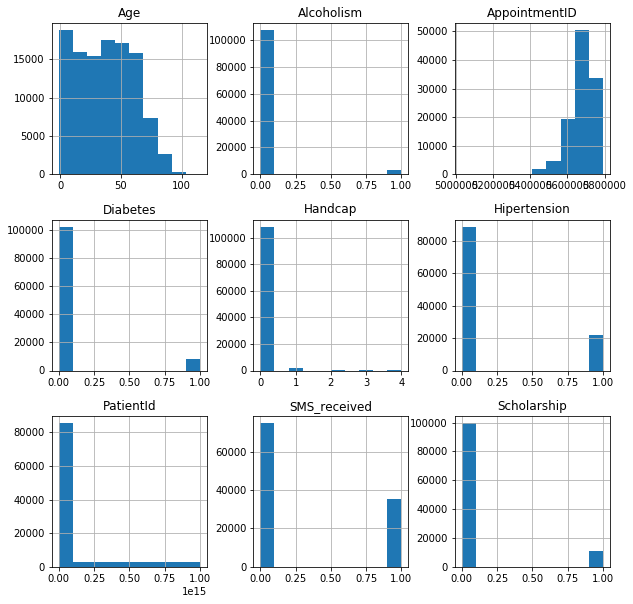

In [95]:
#plotting histogram of dataset
df.info()
df.hist(figsize=(10,10));

From the plot above it  can be seen that
.the  most people that scheduled appointment are below the age of 50

.very few people had diabetes, alcholism, and handicap

.almost half of the patients recieved an sms

. very few had access to scholarship


### Data Cleaning
 

In [96]:
#checking for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [97]:
#checking unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

information showing the numbers of different entries for each column. It can be seen from the patientID that some patient had more than one appointmrnt scheduled.

In [98]:
#droppng  column as they are not needed
df.drop(['AppointmentID'] , axis = 1, inplace = True)


In [99]:
#replacing space with underscore in columns
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [100]:
#replacing with underscore and making lower case
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [101]:
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

this shows the total number of people that showed up being 88208 and not showing up as 22319

In [102]:
df['age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

from the occurence of data in the ages it can be seen that an impossible age of -1 exist and some few patient are way older than 100. Therefore they can be considered as outliers and will be dropped. 


In [103]:
#dropping ages less than 0 and greater than 100
df.drop(df[(df.age < 0) | (df.age > 100)].index, inplace = True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 13 columns):
patientid         110519 non-null float64
gender            110519 non-null object
scheduledday      110519 non-null object
appointmentday    110519 non-null object
age               110519 non-null int64
neighbourhood     110519 non-null object
scholarship       110519 non-null int64
hipertension      110519 non-null int64
diabetes          110519 non-null int64
alcoholism        110519 non-null int64
handcap           110519 non-null int64
sms_received      110519 non-null int64
no_show           110519 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 11.8+ MB


In [105]:
#new  data frame after dropping some ages
df.shape

(110519, 13)

In [106]:
df['gender'].value_counts()

F    71832
M    38687
Name: gender, dtype: int64

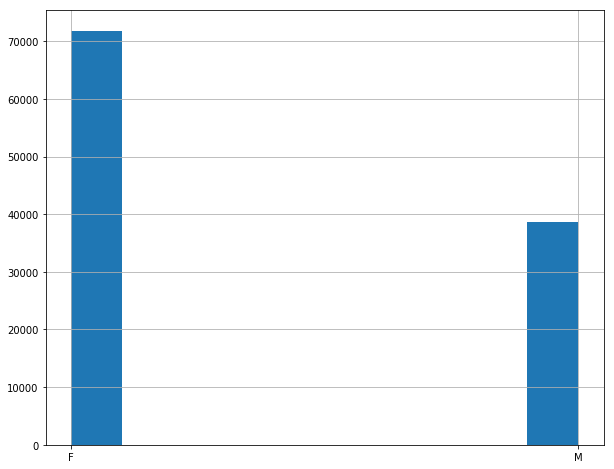

In [107]:
# histogram of gender distribution
df.gender.hist(figsize=(10,8));

In [108]:
df['sms_received'].value_counts()

0    75038
1    35481
Name: sms_received, dtype: int64

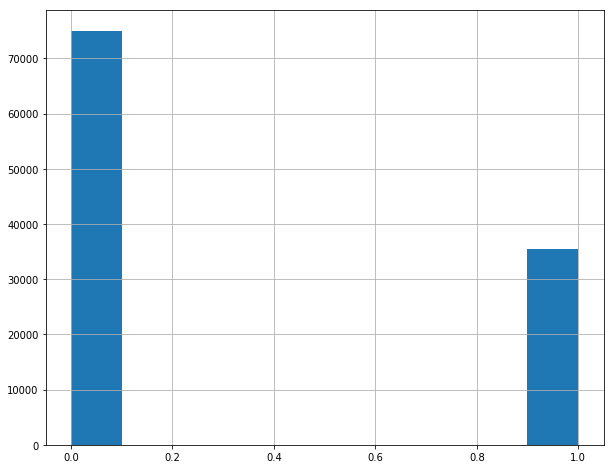

In [109]:
# histogram of sms distribution
df.sms_received.hist(figsize=(10,8));

In [110]:
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2258
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1976
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [111]:
#changing yes =no show and no=show according to the data description
no_show = df['no_show'][(df['no_show'] == "Yes") ].count() 
showed = df['no_show'][(df['no_show'] == "No") ].count()

In [112]:
#showing values for showed up and did not show up
showed , no_show

(88203, 22316)

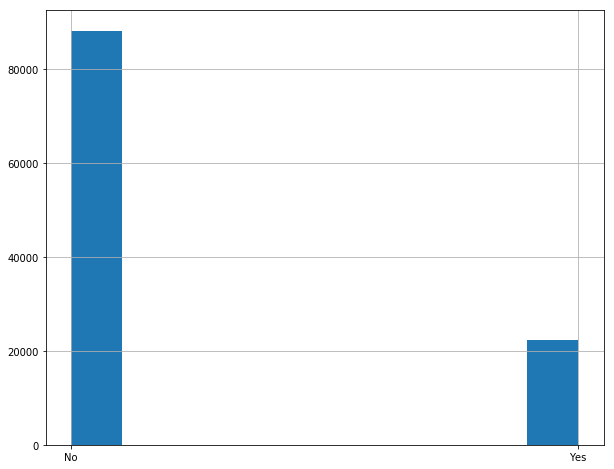

In [113]:
#histogram of no show 
df.no_show.hist(figsize=(10,8));

majority showed up for appointment

The patient showing up or not is the dependent variable(no show)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Is gender a factor for showing up)

In [114]:
#total number of each genders
df['gender'].value_counts()

F    71832
M    38687
Name: gender, dtype: int64

the total number of male that scheduled appointment was 38687 and female was 71832

In [115]:
# Use filters to separate data with values "M" and "F"
male = df['gender'][(df['gender'] == "M")].count()
female = df['gender'][(df['gender'] == "F")].count()

In [116]:
# Separate columns "gender" and "no_show" to check relationship
df_gender = df[['gender', 'no_show']]
df_gender.head()

,gender,no_show
0,F,No
1,M,No
2,F,No
3,F,No
4,F,No


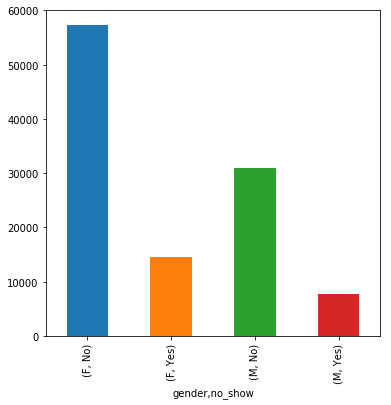

In [117]:
# bar chart of gender relating to no show and show
df.groupby('gender').no_show.value_counts()
df.groupby('gender').no_show.value_counts().plot(kind= 'bar', figsize=(6,6));

From the plot above it can be seen that the female gender showed up more

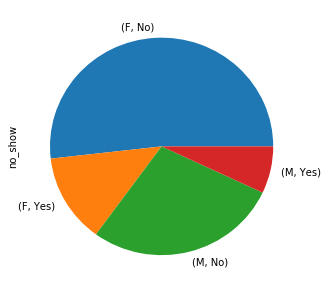

In [118]:
# pie chart of gender relating to no show and show
df.groupby('gender').no_show.value_counts()
df.groupby('gender').no_show.value_counts().plot(kind= 'pie' , figsize=(5,5));

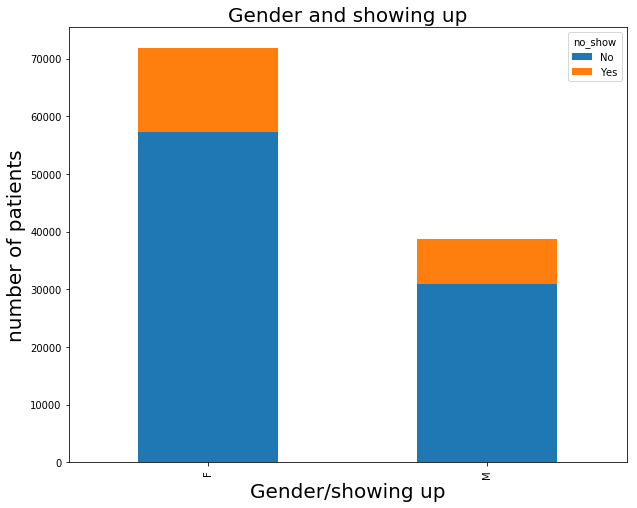

In [119]:
# plotting a stacked bar chart of gender relating to no show and show to examine proportion
df.groupby('gender').no_show.value_counts()
fig, ax = plt.subplots()
df.groupby('gender').no_show.value_counts().sms_received=pd.crosstab(df['gender'],df['no_show']).plot(kind= 'bar', stacked=True , figsize=(10,8), ax = ax);
plt.title('Gender and showing up', fontsize = 20.0)
plt.ylabel('number of patients', fontsize = 20.0)
plt.xlabel('Gender/showing up', fontsize = 20.0)
plt.show()

According to the stacked bar chart each porportion of the gender has no much diffrence when showing up for appointment

### Research Question 2  ( IS recieving an sms neccessary for showing up?)

In [120]:
#total number of each people that recieved sms
df['sms_received'].value_counts()

0    75038
1    35481
Name: sms_received, dtype: int64

fewer people recieved sms

In [121]:
# Separate columns "sms_received" and "no_show" to check relationship
df_smsr =df[['sms_received', 'no_show']]
df_smsr.head()

,sms_received,no_show
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No


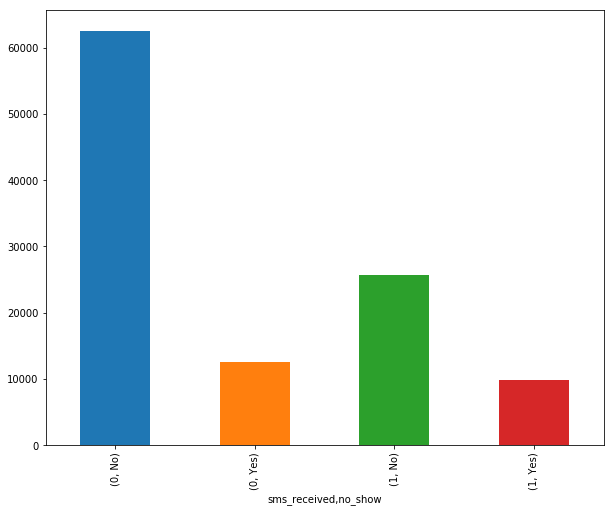

In [122]:
# bar chart of sms relating to no show and show
df.groupby('sms_received').no_show.value_counts()
df.groupby('sms_received').no_show.value_counts().plot(kind= 'bar', figsize=(10,8));

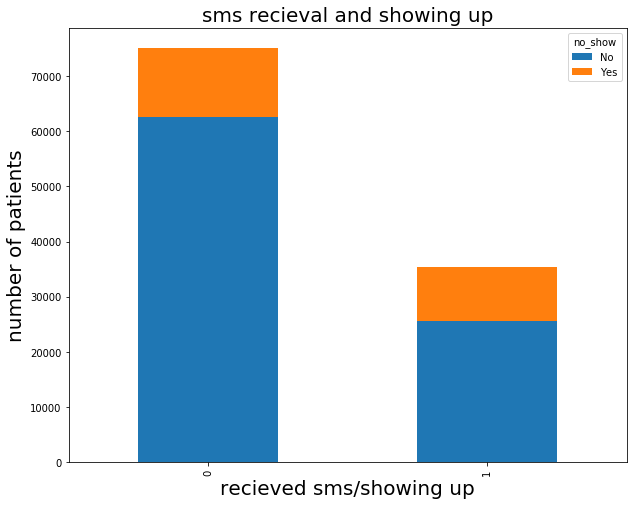

In [123]:
# plotting a stacked bar chart of sms relating to no show and show to examine proportion
df.groupby('sms_received').no_show.value_counts()
fig, ax = plt.subplots()
df.groupby('sms_received').no_show.value_counts().sms_received=pd.crosstab(df['sms_received'],df['no_show']).plot(kind= 'bar',stacked=True, figsize=(10,8), ax = ax);
plt.title('sms recieval and showing up', fontsize = 20.0)
plt.ylabel('number of patients', fontsize = 20.0)
plt.xlabel('recieved sms/showing up', fontsize = 20.0)
plt.show()

###  Research Question 3 (which hospital location had more appointment.)

In [124]:
#total number of each neighbourhood
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2258
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1976
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [125]:
# Separate columns "neighbourhood" and "no_show" to check relationship
df_neighbourhood = df[['neighbourhood', 'no_show']]
df_neighbourhood.head()

,neighbourhood,no_show
0,JARDIM DA PENHA,No
1,JARDIM DA PENHA,No
2,MATA DA PRAIA,No
3,PONTAL DE CAMBURI,No
4,JARDIM DA PENHA,No


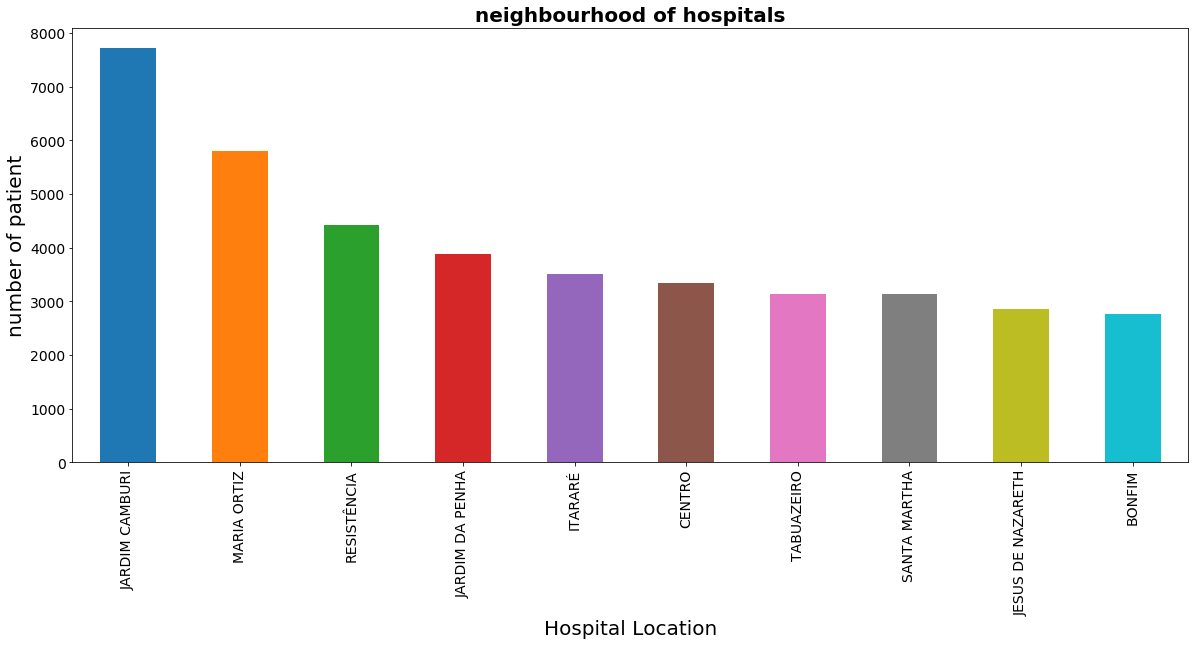

In [126]:
# plotting a bar chart of hospital location
df['neighbourhood'].value_counts().sort_values(ascending = False)[:10].plot.bar(figsize=(20,8), fontsize = 14.0)
plt.title('neighbourhood of hospitals', fontweight="bold", fontsize = 20.0)
plt.ylabel('number of patient', fontsize = 20.0)
plt.xlabel('Hospital Location', fontsize = 20.0)
plt.show()

Hospital in jardim camburi is very booked 

### Research Question 4 (will people involved in scholarship show up more.)

In [128]:
#total number of each scholarship
df['scholarship'].value_counts()

0    99658
1    10861
Name: scholarship, dtype: int64

In [129]:
# Separate columns "sms_received" and "no_show" to check relationship
df_scholarship =df[['scholarship', 'no_show']]
df_scholarship.head()

,scholarship,no_show
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No


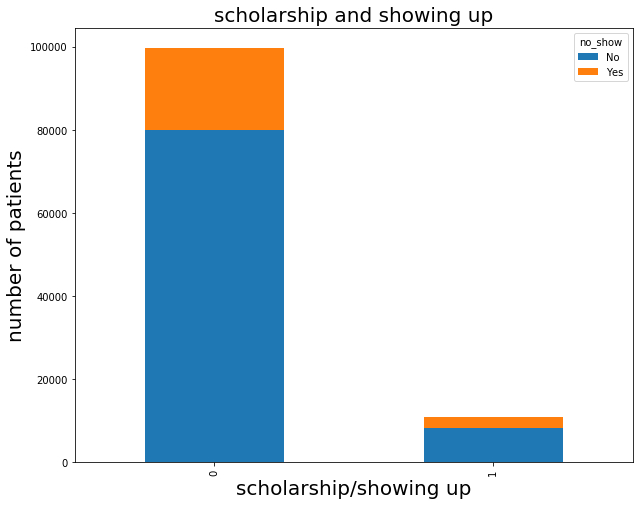

In [130]:
# plotting a stacked bar chart of gender relating to no show and show to examine proportion
df.groupby('scholarship').no_show.value_counts()
fig, ax = plt.subplots()
df.groupby('scholarship').no_show.value_counts().scholarship=pd.crosstab(df['scholarship'],df['no_show']).plot(kind= 'bar', stacked=True, figsize=(10,8), ax = ax);
plt.title('scholarship and showing up', fontsize = 20.0)
plt.ylabel('number of patients', fontsize = 20.0)
plt.xlabel('scholarship/showing up', fontsize = 20.0)
plt.show()

<a id='conclusions'></a>
## Conclusions

 1. Majority who scheduled appointment with doctors were mostly female and were much larger than the male counterpart, but looking at the proportion of gender and showing up, no much difference is observed as same proportion of gender that apply didn't show up. very few people went to the hospital for the sake of each disease type.
 

2. not everyone that recieved an sms showed up for their appointment which i think was dissapointing, as i view it as a marketing strategy that didn't fulfill it's potential. 


3. Majority of the appointment made happend at the hospital locted at Jardim Camburi.


4. People that have access to scholarship didn't turn up fully as expected,dissapointing because very few had the opportunity for scholarship.



## Limitations

1. the criteria for sending out sms to a patient is not known,which might have broaden analysis on sms .
2. the criteria foe access to scholarship is also not known.
 



## Submitting your Project 



In [131]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0